PUBG placement prediction estimator
https://www.kaggle.com/competitions/pubg-finish-placement-prediction
https://openclassrooms.com/en/courses/6389626-train-a-supervised-machine-learning-model/6398756-build-a-model-with-python

53.284661425694296
54.0
0    100.0
dtype: float64


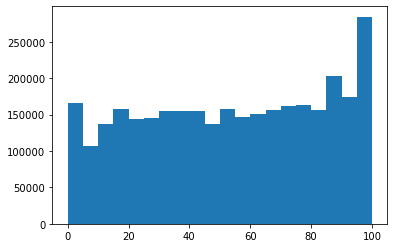

In [5]:
import pandas as pd
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
data = pd.read_csv('train_V2.csv')
data.drop(data[(data['kills'] == 0) & (data['damageDealt'] == 0)].index, inplace=True)
data['winPlacePerc'] = round(100 * data['winPlacePerc'], 0)
responseY = data["winPlacePerc"]
explanatoryX = data[["damageDealt","kills", "assists", "walkDistance", "matchDuration"]]
responseY.head()
# Split into test and training sets
test_size = 0.05
seed = 7
X_train, X_test, y_train, y_test =  train_test_split(explanatoryX, responseY, test_size=test_size, random_state=seed)
#Select algorithm
model = tree.DecisionTreeClassifier()
#Fit model to the data
model.fit(X_train, y_train)
dump(model, 'model.joblib')
print(data['winPlacePerc'].mean())
print(data['winPlacePerc'].median())
print(data['winPlacePerc'].mode())

Current prediction accuracies: 
Unfiltered index (Kills/Damage/Assists only) = 0.15057187304782632
Filtered index (Kills/Damage only) = 0.15173282672728677
Filtered index (Kills/Damage/Assists only) = 0.19953837764891305
Filtered index (Kills/Damage/Assists/WalkDistance only) = 0.9338378644862023
Filtered index (Kills/Damage/Assists/WalkDistance/matchDuration only) = 0.998886404549495
Filtered index & test size .75 (Kills/Damage/Assists/WalkDistance/matchDuration only) = 0.9993302243126084
Achieved 1 with current parameters